In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [2]:
train = pd.read_csv("train.csv", parse_dates = ['datetime'])
test = pd.read_csv("test.csv", parse_dates = ['datetime'])

print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


*  공통 사용 feature 
*  datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed
*  parsing date = datetime

In [5]:
train_test = [train, test]

In [6]:
for dataset in train_test:
    dataset['datetime-year'] = dataset['datetime'].dt.year
    dataset['datetime-month'] = dataset['datetime'].dt.month
    dataset['datetime-day'] = dataset['datetime'].dt.day
    dataset['datetime-hour'] = dataset['datetime'].dt.hour
    dataset['datetime-minute'] = dataset['datetime'].dt.minute
    dataset['datetime-second'] = dataset['datetime'].dt.second
    
    dataset['datetime-dayofweek'] = dataset['datetime'].dt.dayofweek
    
train[['datetime', 'datetime-dayofweek']].head()

,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


In [7]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek'],
      dtype='object')

In [8]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-month',
       'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second',
       'datetime-dayofweek'],
      dtype='object')

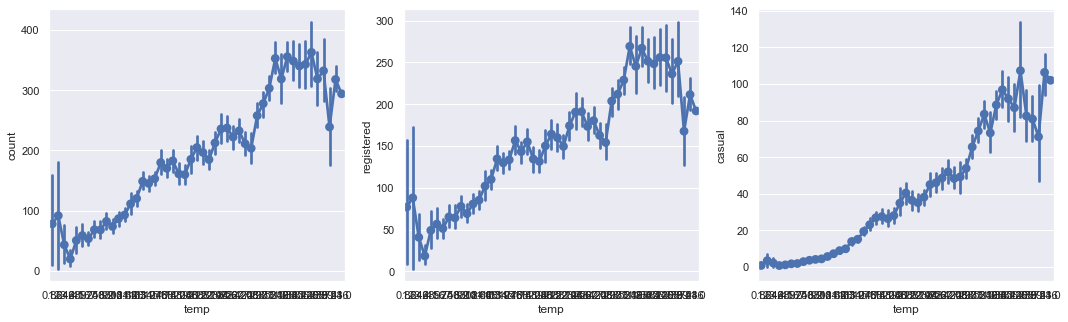

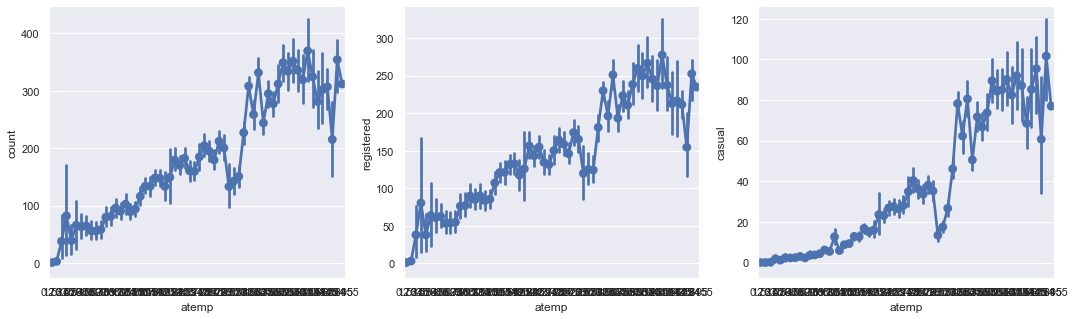

In [9]:
f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

sns.pointplot(data=train, x='temp', y='count', ax=ax[0])
sns.pointplot(data=train, x='temp', y='registered', ax=ax[1])
sns.pointplot(data=train, x='temp', y='casual', ax=ax[2])

f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

sns.pointplot(data=train, x='atemp', y='count', ax=ax[0])
sns.pointplot(data=train, x='atemp', y='registered', ax=ax[1])
sns.pointplot(data=train, x='atemp', y='casual', ax=ax[2])

plt.show()

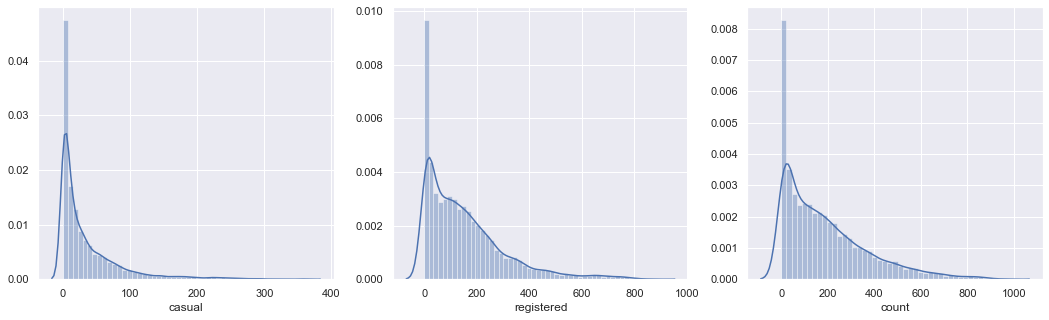

In [10]:
f, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(18, 5))

sns.distplot(train['casual'], ax=ax[0])
sns.distplot(train['registered'], ax=ax[1])
sns.distplot(train['count'], ax=ax[2])

plt.show()

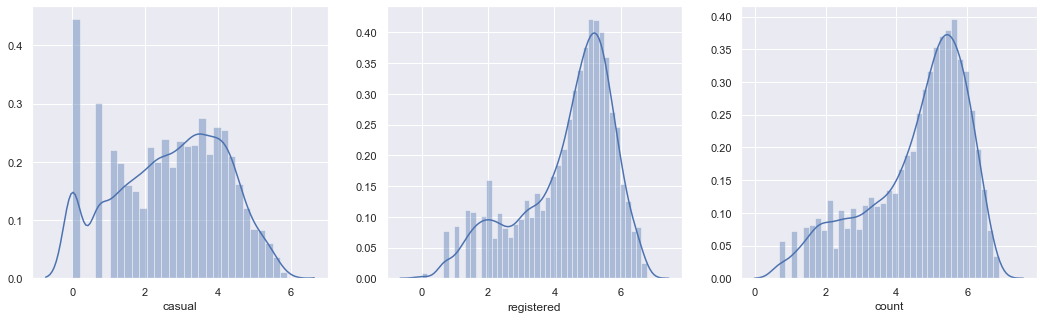

In [11]:
f, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(18, 5))


sns.distplot(np.log(train['casual'] + 1), ax=ax[0])
sns.distplot(np.log(train['registered'] + 1), ax=ax[1])
sns.distplot(np.log(train['count'] + 1), ax=ax[2])

plt.show()

In [12]:
train[['temp', 'count']].groupby('temp', as_index=False).mean()

,temp,count
0,0.82,77.714286
1,1.64,91.500000
2,2.46,43.000000
3,3.28,19.272727
4,4.10,50.272727
5,4.92,58.416667
6,5.74,53.233645
7,6.56,68.109589
8,7.38,67.754717
9,8.20,81.995633


In [13]:
train[['atemp', 'count']].groupby('atemp', as_index=False).mean()

,atemp,count
0,0.760,1.000000
1,1.515,3.000000
2,2.275,38.000000
3,3.030,82.285714
4,3.790,39.062500
5,4.545,66.090909
6,5.305,63.200000
7,6.060,64.876712
8,6.820,56.380952
9,7.575,55.933333


In [14]:
for dataset in train_test:
    dataset.loc[dataset['temp'] <= 10.66, 'temp'] = 0
    dataset.loc[(dataset['temp'] > 10.66) & (dataset['temp'] <= 19.68), 'temp'] = 1
    dataset.loc[(dataset['temp'] > 19.68) & (dataset['temp'] <= 29.52), 'temp'] = 2
    dataset.loc[dataset['temp'] > 29.52, 'temp'] = 3
    dataset['temp'] = dataset['temp'].astype(int)   

In [15]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,1.480525,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963
std,1.116174,0.166599,0.466159,0.633839,0.877806,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,2.000000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000
75%,4.000000,0.000000,1.000000,2.000000,2.000000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000
max,4.000000,1.000000,1.000000,4.000000,3.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000


In [16]:
for dataset in train_test:
    dataset.loc[dataset['atemp'] <= 13.635, 'atemp'] = 0
    dataset.loc[(dataset['atemp'] > 13.635) & (dataset['atemp'] <= 30.305), 'atemp'] = 1
    dataset.loc[dataset['atemp'] > 30.305, 'atemp'] = 2
    dataset['atemp'] = dataset['atemp'].astype(int)
    
train.describe()    

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,1.480525,1.110876,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0,3.013963
std,1.116174,0.166599,0.466159,0.633839,0.877806,0.640049,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0,1.000000
50%,3.000000,0.000000,1.000000,1.000000,2.000000,1.000000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0,3.000000
75%,4.000000,0.000000,1.000000,2.000000,2.000000,2.000000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0,5.000000
max,4.000000,1.000000,1.000000,4.000000,3.000000,2.000000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0,6.000000


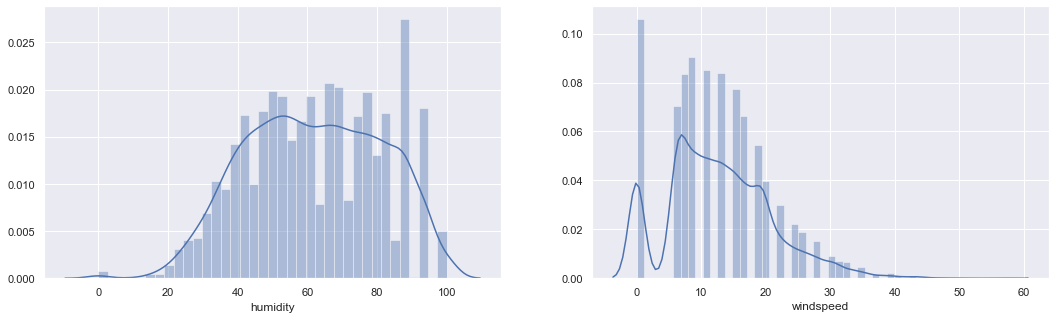

In [17]:
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 5))

sns.distplot(train['humidity'], ax=ax[0])
sns.distplot(train['windspeed'], ax=ax[1])

plt.show()

In [18]:
print(train.columns)
print(test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-month',
       'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second',
       'datetime-dayofweek'],
      dtype='object')


In [19]:
for dataset in train_test:
    dataset.loc[dataset['datetime-year'] == 2011, 'datetime-year'] = 0
    dataset.loc[dataset['datetime-year'] == 2012, 'datetime-year'] = 1
    
train['datetime-year'].head()

0    0
1    0
2    0
3    0
4    0
Name: datetime-year, dtype: int64

In [20]:
train_data = train[['season', 'holiday', 'workingday', 'weather', 'temp',
                   'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-month', 
                   'datetime-day', 'datetime-hour', 'datetime-dayofweek']]
train_label = train['count']
test_data = test[['season', 'holiday', 'workingday', 'weather', 'temp',
                 'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-month',
                 'datetime-day', 'datetime-hour', 'datetime-dayofweek']]

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [22]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [23]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [24]:
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))

Accuracy :  100.0 %


In [25]:
test_sub = pd.read_csv('test.csv', parse_dates=['datetime'])

In [35]:
submission = pd.DataFrame({
    
    "datetime" : test["datetime"],
    "count": rf_pred
})


submission.to_csv('Bike_Submission.csv', index=False)

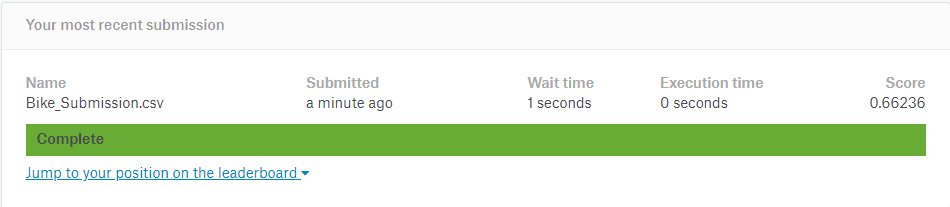